# 年金

In [228]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

figsize = (1.618*6, 6)

path = '../../data/pension_management.xlsx'
df = pd.read_excel(path, sheet_name='pension_monthly')
df = pl.DataFrame({
    'age': df['age'],
    'month': df['month'],
    'start_60': df['start_60'] / 10000,
    'start_65': df['start_65'] / 10000,
    'start_70': df['start_70'] / 10000,
    'start_75': df['start_75'] / 10000,
})

df_pm_4 = pd.read_excel(path, sheet_name='monthly_4')
df_pm_4 = pl.DataFrame({
    'age': df_pm_4['age'],
    'month': df_pm_4['month'],
    'start_60': df_pm_4['start_60'] / 10000,
    'start_65': df_pm_4['start_65'] / 10000,
    'start_70': df_pm_4['start_70'] / 10000,
    'start_75': df_pm_4['start_75'] / 10000,
})

df_pm_7 = pd.read_excel(path, sheet_name='monthly_7')
df_pm_7 = pl.DataFrame({
    'age': df_pm_7['age'],
    'month': df_pm_7['month'],
    'start_60': df_pm_7['start_60'] / 10000,
    'start_65': df_pm_7['start_65']/ 10000,
    'start_70': df_pm_7['start_70'] / 10000,
    'start_75': df_pm_7['start_75'] / 10000,
})

In [174]:
df['start_60'].min() / 6

17226.666666666668

$$
\begin{aligned}
(1 + 2月利)^{6} &= (1+ 年利) \\
\log(1 + 2月利) &= \frac{\log(1 + 年利)}{6} \\
2月利 &= \exp \left(\frac{\log(1 + 年利)}{6} \right) - 1\\
\end{aligned}
$$

In [240]:
(np.exp(np.log(1.04) / 6) - 1).round(5)

0.00656

In [230]:
yr = 0.0066 * 6
print(f'Yearly rate: {yr:.3f}')

Yearly rate: 0.040


In [231]:
df_cumsum = df.with_columns([
    pl.col('start_60').cum_sum(),
    pl.col('start_65').cum_sum(),
    pl.col('start_70').cum_sum(),
    pl.col('start_75').cum_sum(),
])

Text(0.5, 1.0, '年金を運用しない場合')

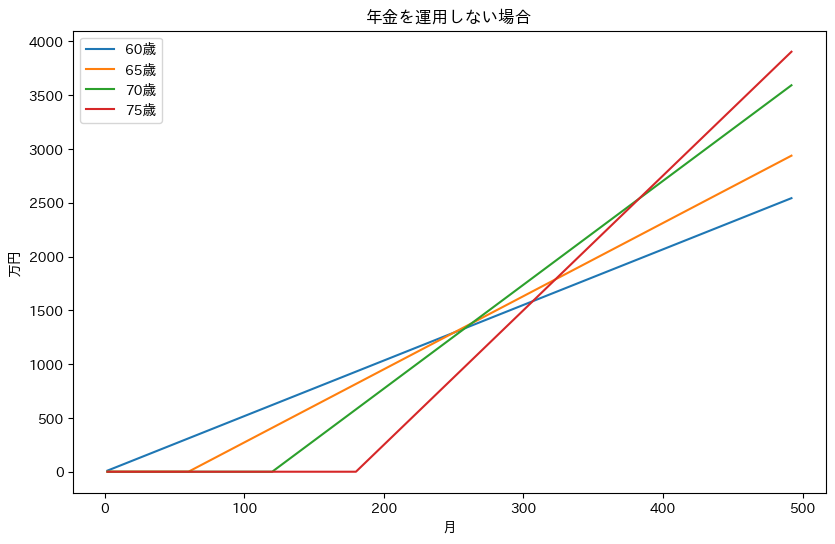

In [238]:
fig, ax = plt.subplots(figsize=figsize)
for col in df_cumsum.columns[2:]:
    label = '60歳' if col == 'start_60' else col
    label = '65歳' if col == 'start_65' else label
    label = '70歳' if col == 'start_70' else label
    label = '75歳' if col == 'start_75' else label
    sns.lineplot(data=df_cumsum.to_pandas(), x='month', y=col, ax=ax, label=label)
ax.set_xlabel('月')
ax.set_ylabel('万円')
ax.set_title('年金を運用しない場合')

Text(0.5, 1.0, '年金を年利4%で運用する場合')

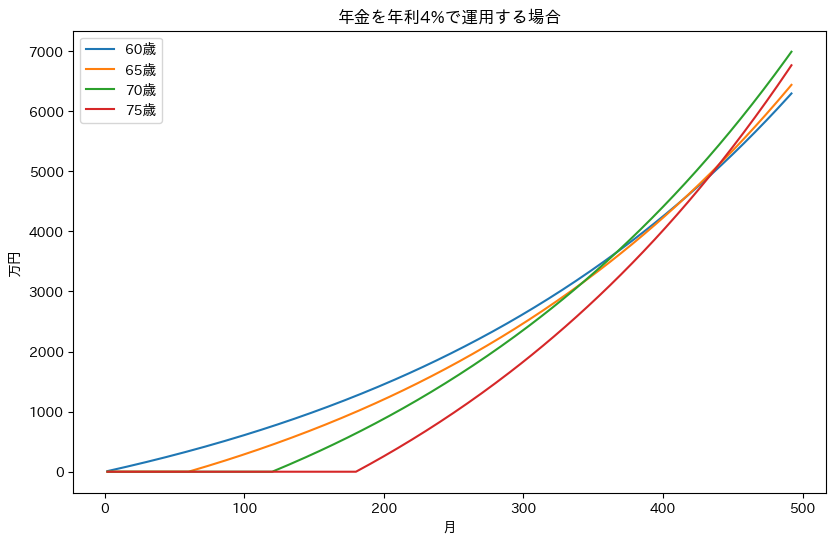

In [237]:
fig, ax = plt.subplots(figsize=figsize)
for col in df_pm_4.columns[2:]:
    label = '60歳' if col == 'start_60' else col
    label = '65歳' if col == 'start_65' else label
    label = '70歳' if col == 'start_70' else label
    label = '75歳' if col == 'start_75' else label
    sns.lineplot(data=df_pm_4.to_pandas(), x='month', y=col, ax=ax, label=label)
ax.set_xlabel('月')
ax.set_ylabel('万円')
ax.set_title('年金を年利4%で運用する場合')

Text(0.5, 1.0, '年金を年利7%で運用する場合')

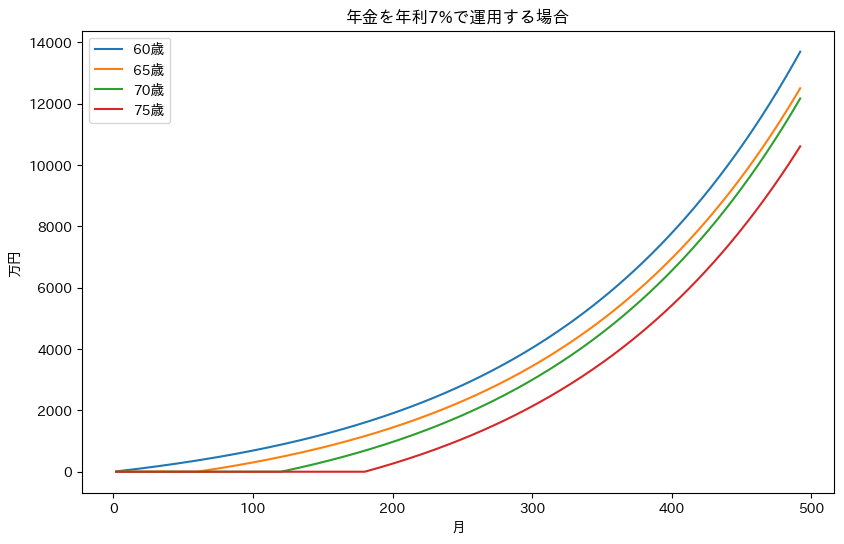

In [239]:
fig, ax = plt.subplots(figsize=figsize)
for col in df_pm_7.columns[2:]:
    label = '60歳' if col == 'start_60' else col
    label = '65歳' if col == 'start_65' else label
    label = '70歳' if col == 'start_70' else label
    label = '75歳' if col == 'start_75' else label
    sns.lineplot(data=df_pm_7.to_pandas(), x='month', y=col, ax=ax, label=label)
ax.set_xlabel('月')
ax.set_ylabel('万円')
ax.set_title('年金を年利7%で運用する場合')